# Making line plots

### Import packages

In [1]:
import numpy                          as np
import matplotlib.pyplot              as plt
import os

# importing plons modules
import plons
import plons.SmoothingKernelScript    as sk
import plons.PhysicalQuantities       as pq
import plons.ConversionFactors_cgs    as cgs

### Setting information about data

In [2]:
prefix = "wind"
loc = "Model"
dumpnumber = 600
dump = os.path.join(loc, f"{prefix}_{dumpnumber:06d}")

### Retrieving the data

Creating the directory to store the models

In [3]:
!mkdir -p $loc

Downloading the data

In [4]:
%%capture
if not os.path.exists(dump):
    !wget "https://github.com/Ensor-code/phantom-models/raw/refs/heads/main/Esseldeurs+2023/BinaryHighLucy/wind_00600?download=" --output-document $dump
infile = os.path.join(loc, f"{prefix}.in")
if not os.path.exists(infile):
    !wget "https://raw.githubusercontent.com/Ensor-code/phantom-models/refs/heads/main/Esseldeurs%2B2023/BinaryHighLucy/wind.in" --output-document $infile
setupfile = os.path.join(loc, f"{prefix}.setup")
if not os.path.exists(setupfile):
    !wget "https://raw.githubusercontent.com/Ensor-code/phantom-models/refs/heads/main/Esseldeurs%2B2023/BinaryHighLucy/wind.setup" --output-document $setupfile

### Loading setup and dump

In [5]:
setup     = plons.LoadSetup(loc, prefix)

In [6]:
dumpData  = plons.LoadFullDump(dump, setup)

### Making x and z lines on which to smooth

In [7]:
n = 200
rx = np.array((np.linspace(-150, 150, n), np.zeros(n), np.zeros(n))).transpose()*cgs.au
theta = pq.getPolarAngleCompanion(dumpData._params['posComp'][0], dumpData._params['posComp'][1])
rz = np.array((np.zeros(n), np.zeros(n), np.linspace(-150, 150, n))).transpose()*cgs.au

### Smoothing the data on the lines

In [8]:
smoothx = sk.getSmoothingKernelledPix(100, dumpData, ['rho'], sk.rotatePixCoordAroundZ(theta, rx))
smoothz = sk.getSmoothingKernelledPix(100, dumpData, ['rho'], rz)

### Plotting the lines

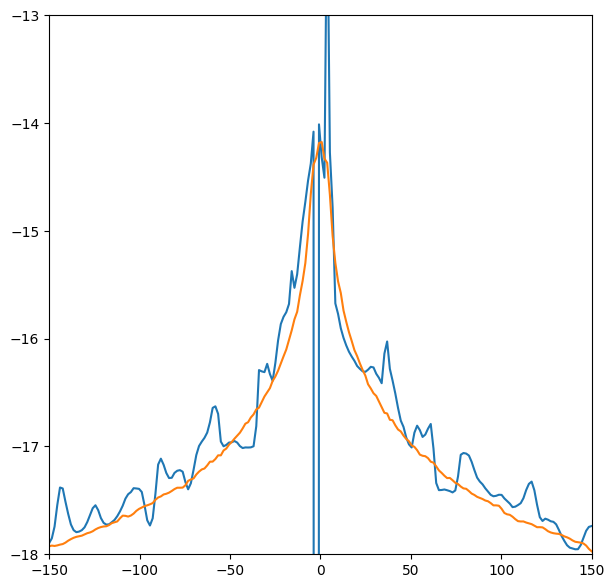

In [9]:
fig, ax = plt.subplots(1, figsize=(7, 7))

ax.plot(rx[:,0]/cgs.au, np.log10(smoothx["rho"]+1e-99))
ax.plot(rz[:,2]/cgs.au, np.log10(smoothz["rho"]+1e-99))
ax.set_xlim(-150, 150)
ax.set_ylim(-18, -13)

plt.show()